In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor

from sklearn.metrics import mean_squared_error, r2_score , make_scorer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from scipy.stats import pearsonr
from scipy.stats import linregress

warnings.filterwarnings('ignore')
#sns.set_theme(style="white", palette="pastel")

In [2]:
pat_68=pd.read_csv('Patient 68_data.csv')
pat_78=pd.read_csv('Patient 78_data.csv')
pat_80=pd.read_csv('Patient 80_data.csv')
pat_112=pd.read_csv('Patient 112_data.csv')
pat_129=pd.read_csv('Patient 129_data.csv')
pat_141=pd.read_csv('Patient 141_data.csv')
pat_147=pd.read_csv('Patient 147_data.csv')
pat_220=pd.read_csv('Patient 220_data.csv')
pat_240=pd.read_csv('Patient 240_data.csv')
pat_253=pd.read_csv('Patient 253_data.csv')
pat_270=pd.read_csv('Patient 270_data.csv')
pat_274=pd.read_csv('Patient 274_data.csv')
pat_278=pd.read_csv('Patient 278_data.csv')
pat_279=pd.read_csv('Patient 279_data.csv')
pat_301=pd.read_csv('Patient 301_data.csv')
pat_302=pd.read_csv('Patient 302_data.csv')
pat_316=pd.read_csv('Patient 316_data.csv')
pat_328=pd.read_csv('Patient 328_data.csv')
pat_341=pd.read_csv('Patient 341_data.csv')
pat_339=pd.read_csv('Patient 339_data.csv')
pat_356=pd.read_csv('Patient 356_data.csv')
pat_361=pd.read_csv('Patient 361_data.csv')
pat_374=pd.read_csv('Patient 374_data.csv')
pat_376=pd.read_csv('Patient 376_data.csv')
pat_379=pd.read_csv('Patient 379_data.csv')
pat_380=pd.read_csv('Patient 380_data.csv')
pat_386=pd.read_csv('Patient 386_data.csv')
pat_395=pd.read_csv('Patient 395_data.csv')
pat_458=pd.read_csv('Patient 458_data.csv')
pat_478=pd.read_csv('Patient 478_data.csv')
pat_1133=pd.read_csv('Patient 1133_data.csv')
pat_1685=pd.read_csv('Patient 1685_data.csv')
pat_3243=pd.read_csv('Patient 3243_data.csv')
pat_3324=pd.read_csv('Patient 3324_data.csv')

poor data: patients 1, 14, 35, 88. 92, 100, 114, pat_129, pat_141, 

In [3]:
#combine the test data
df2=pd.concat([pat_80, pat_141, pat_253, pat_270, pat_374, pat_376, pat_279],  ignore_index=True)
test_dataset=[pat_80, pat_141, pat_253, pat_270, pat_374, pat_376, pat_279, df2]

In [4]:

df1=pd.concat([ pat_68, pat_78, pat_112, pat_147, pat_220, pat_240, pat_274, pat_301,pat_316, pat_328, pat_339, pat_386, pat_380, pat_395, pat_356, pat_3243, pat_3324],  ignore_index=True)



### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    #r2 = r2_score(y_test, y_predicted)
    r, e = pearsonr(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r".format(column)] = r
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()
    
    

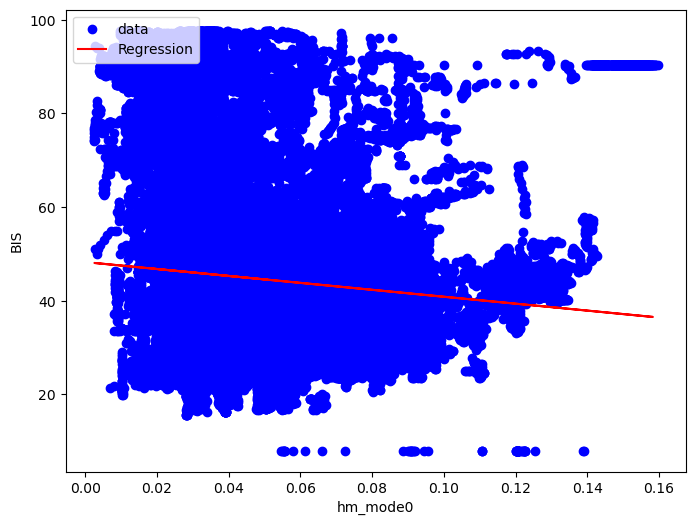

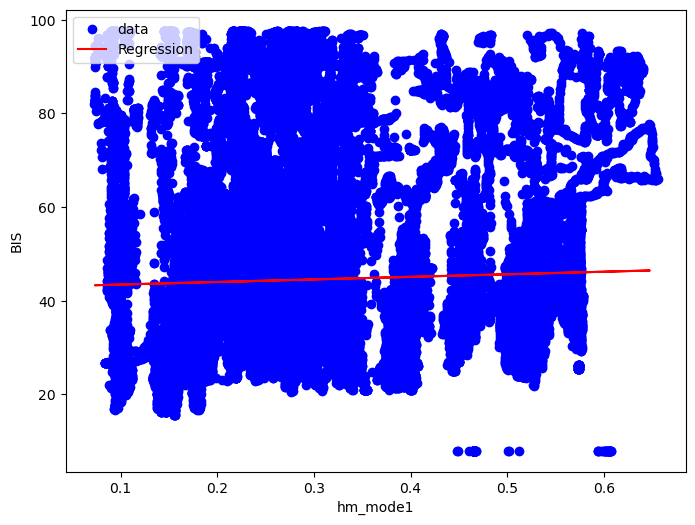

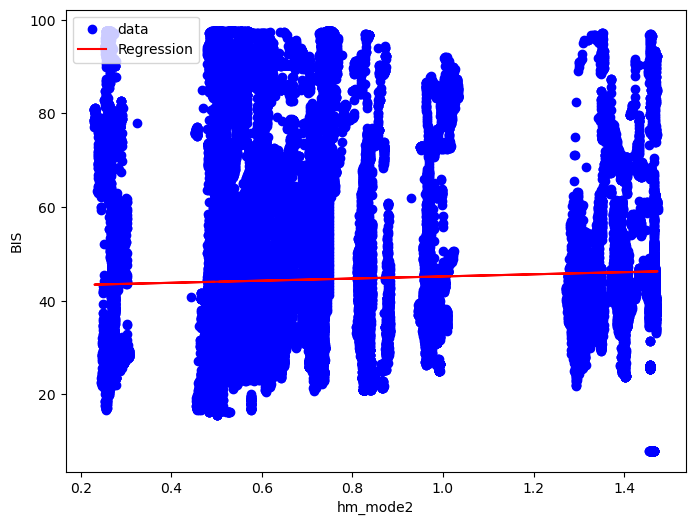

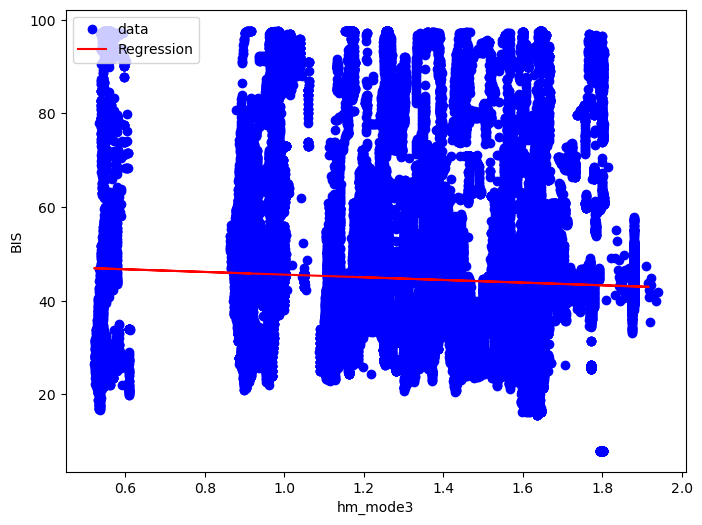

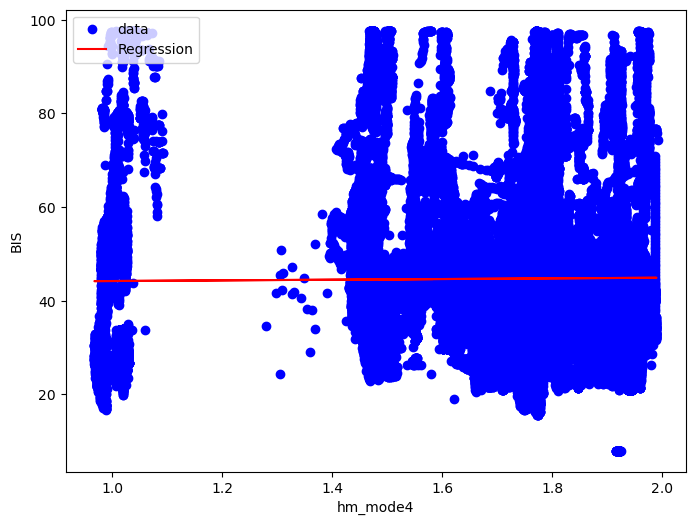

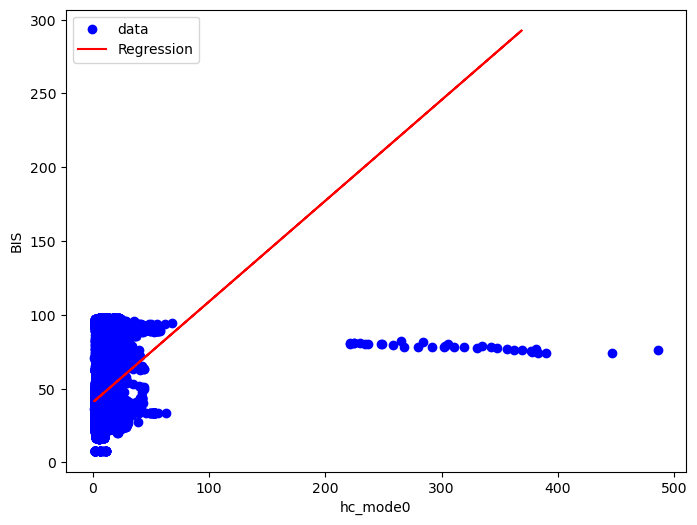

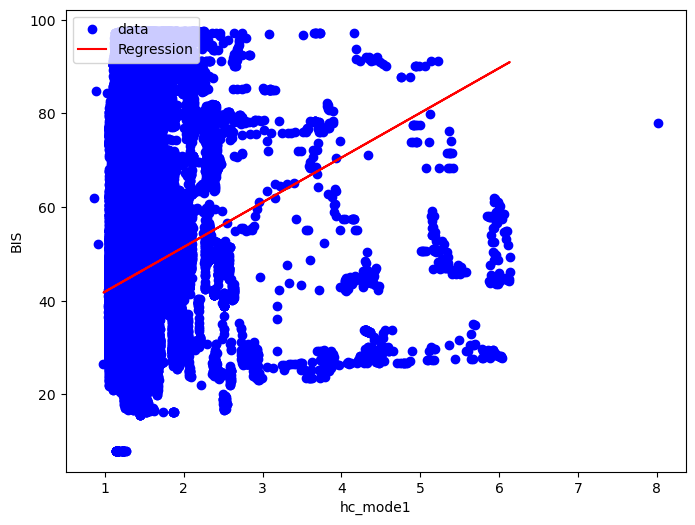

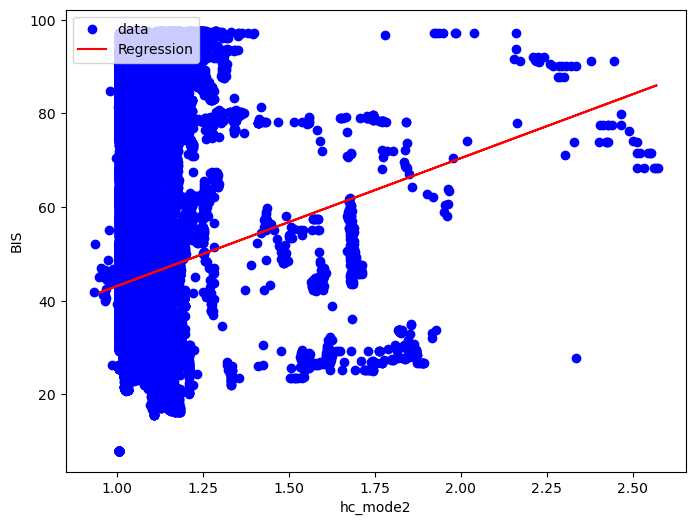

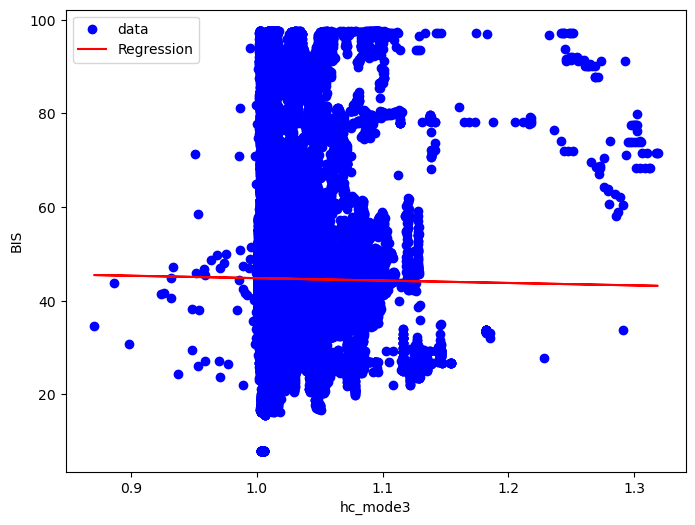

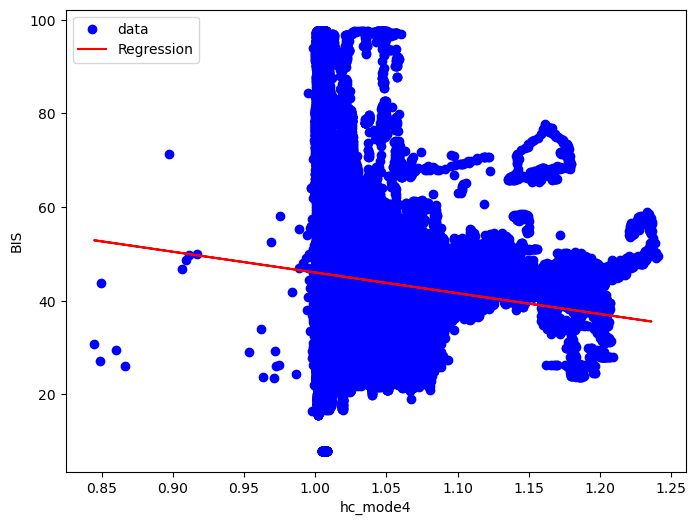

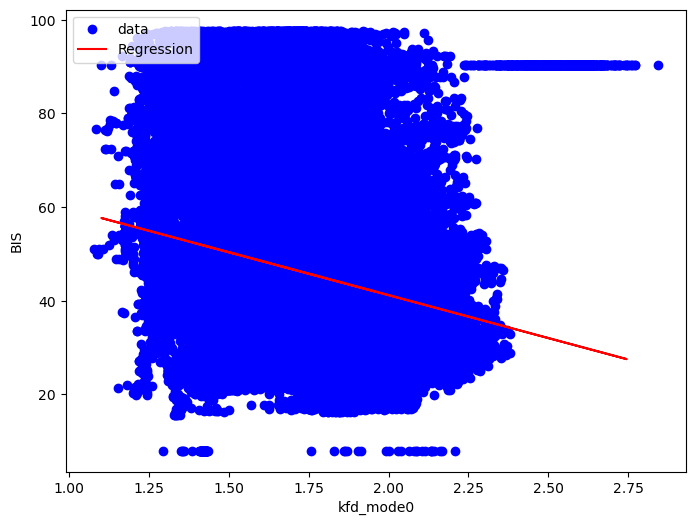

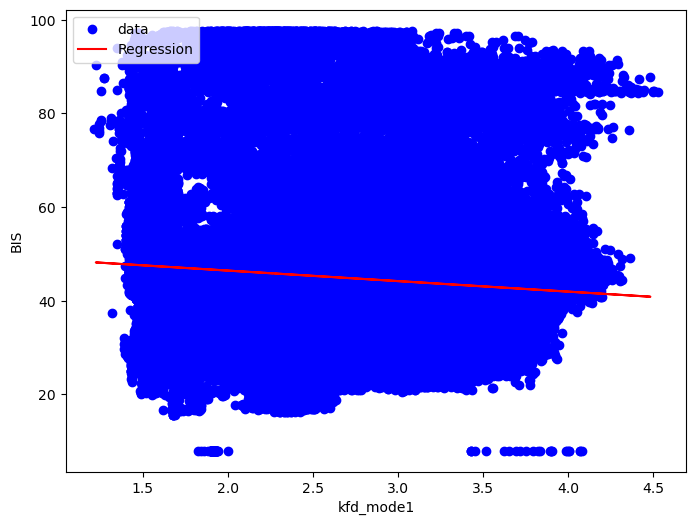

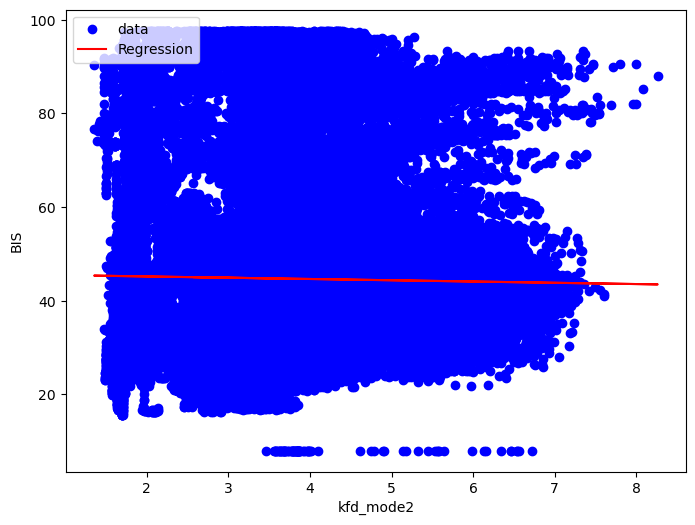

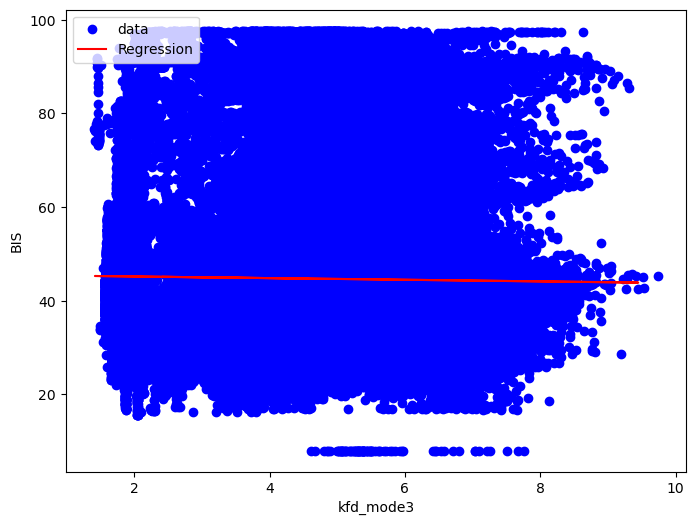

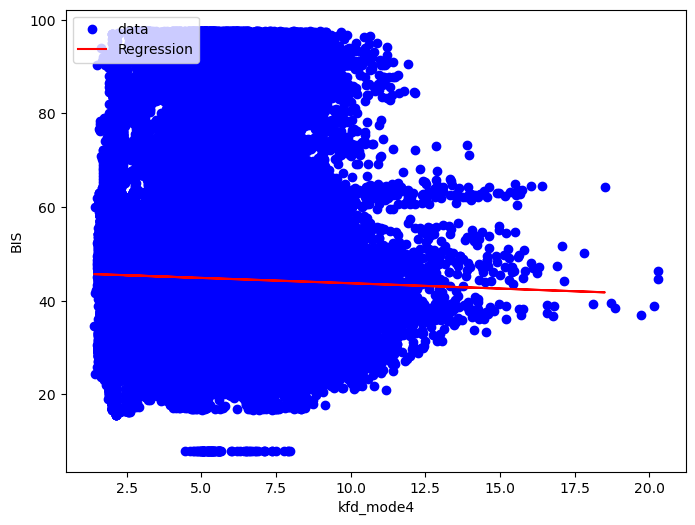

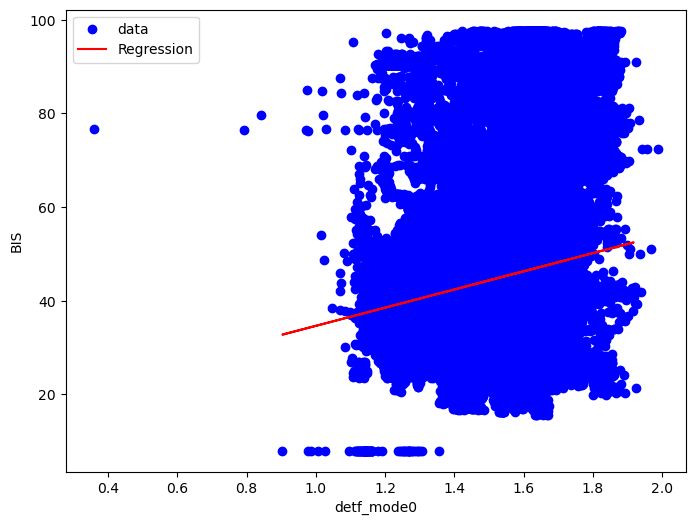

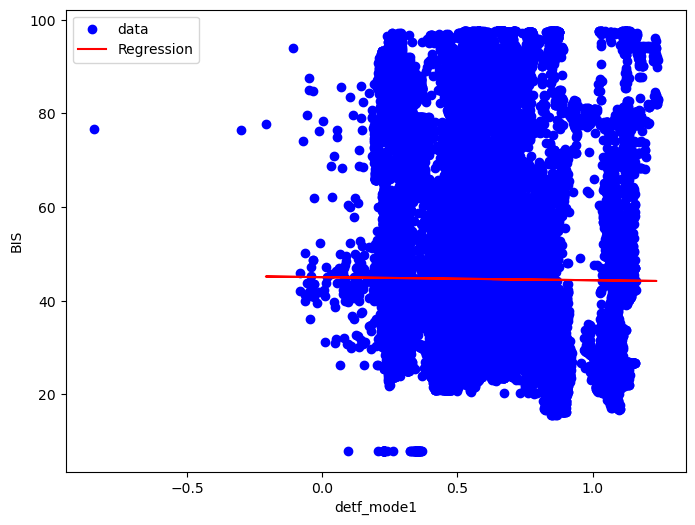

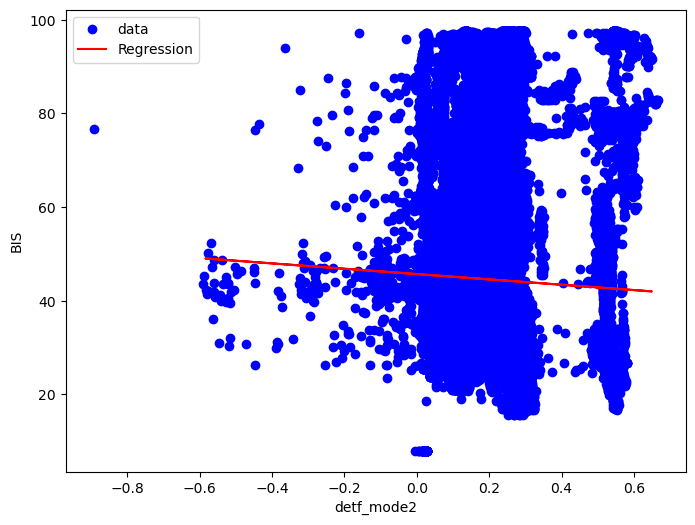

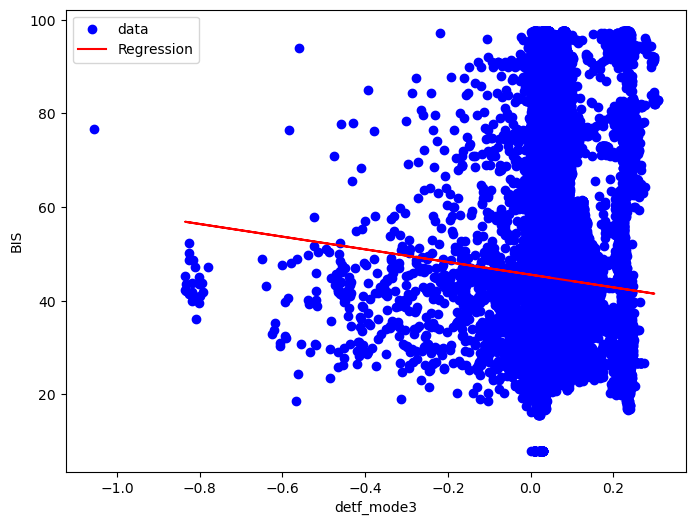

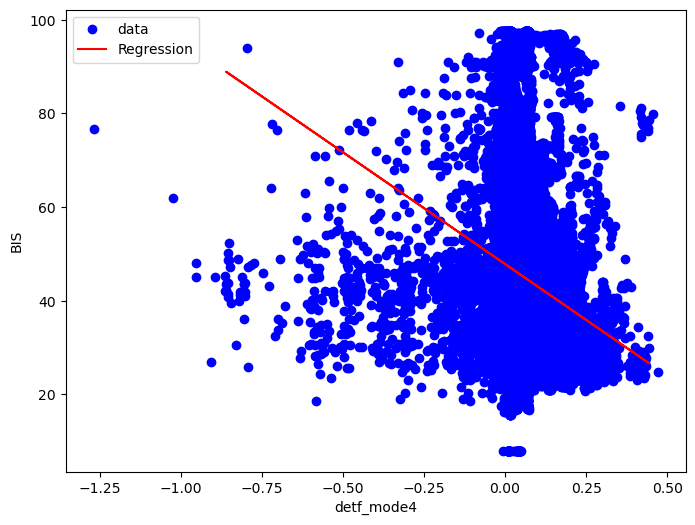

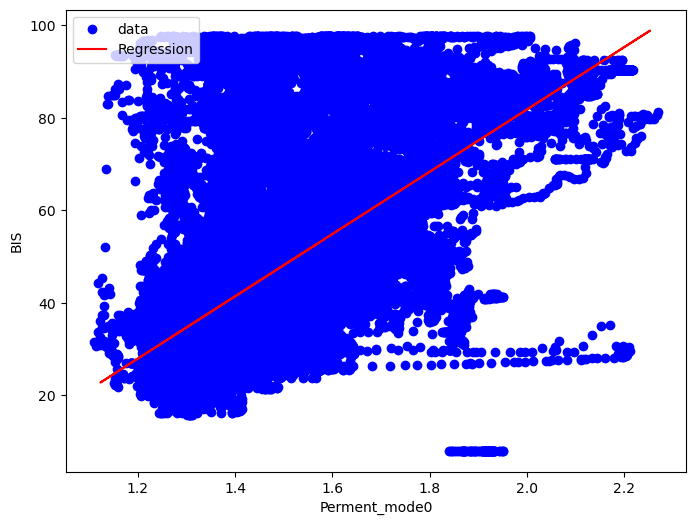

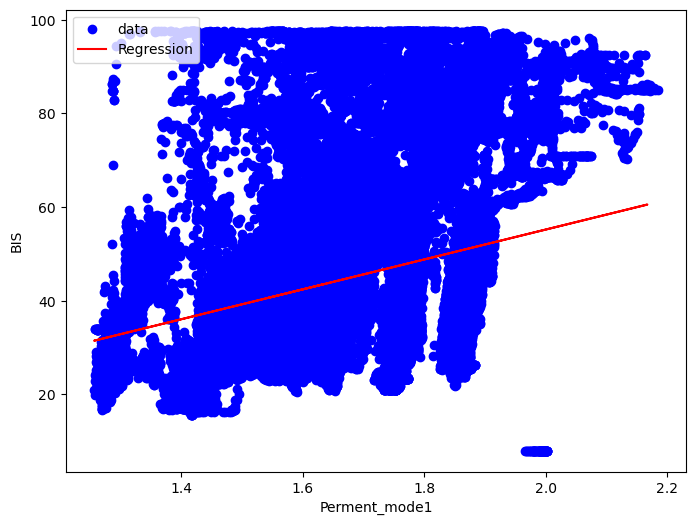

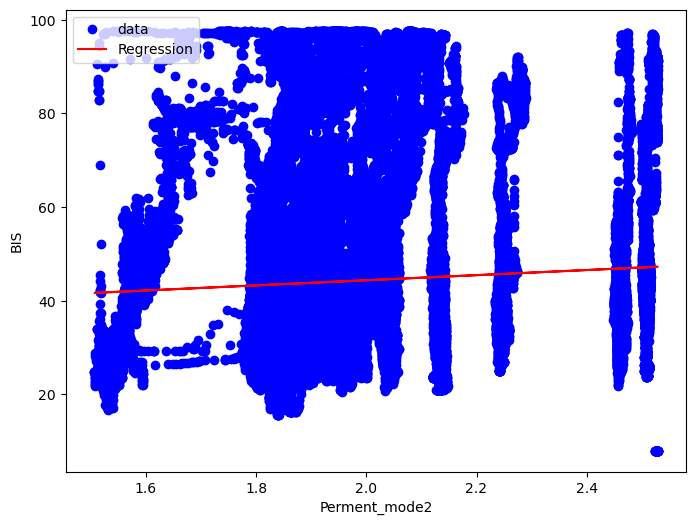

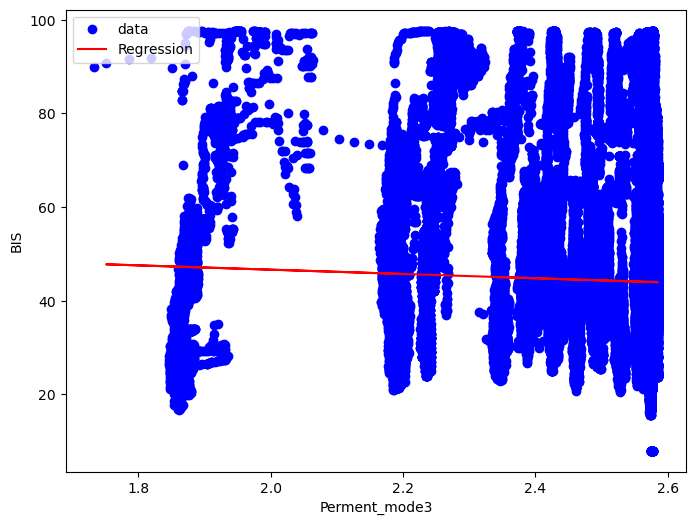

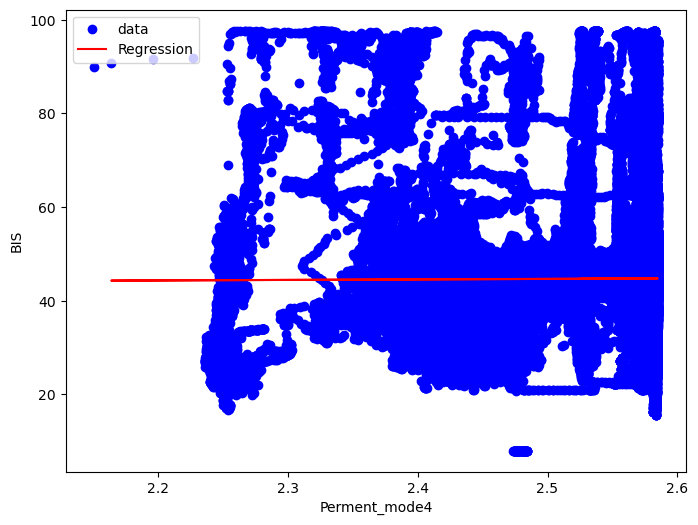

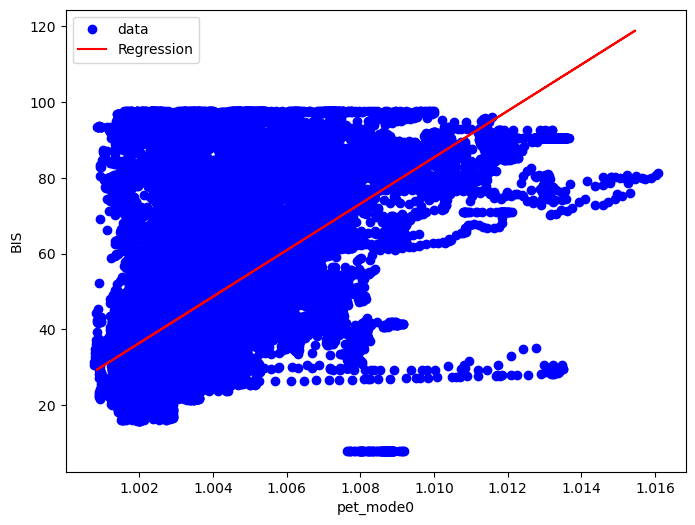

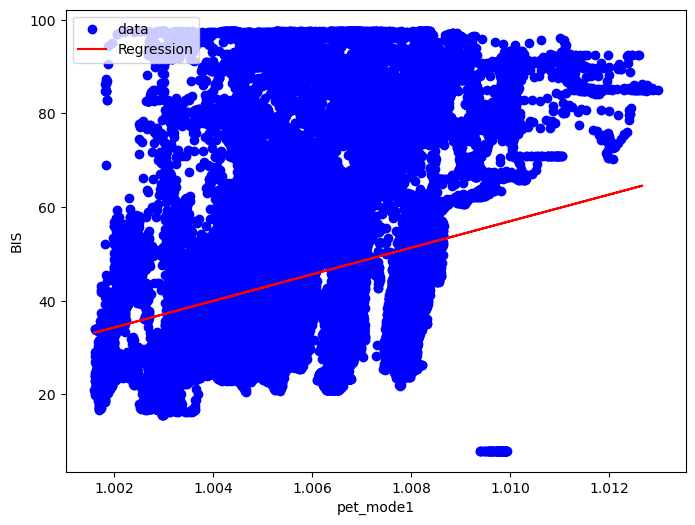

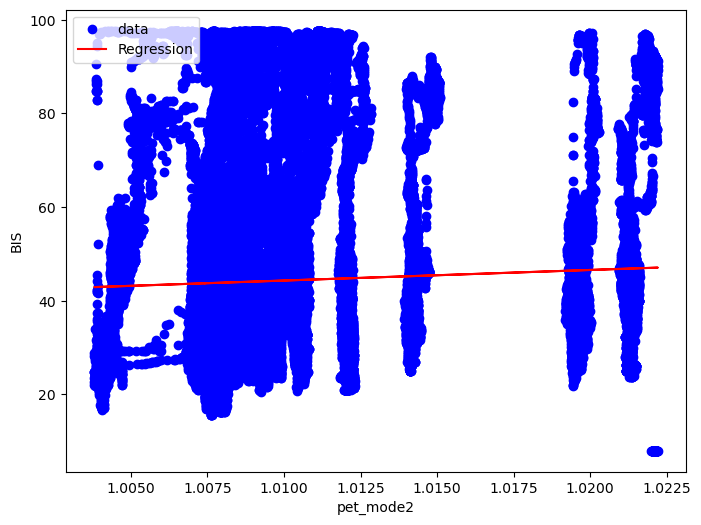

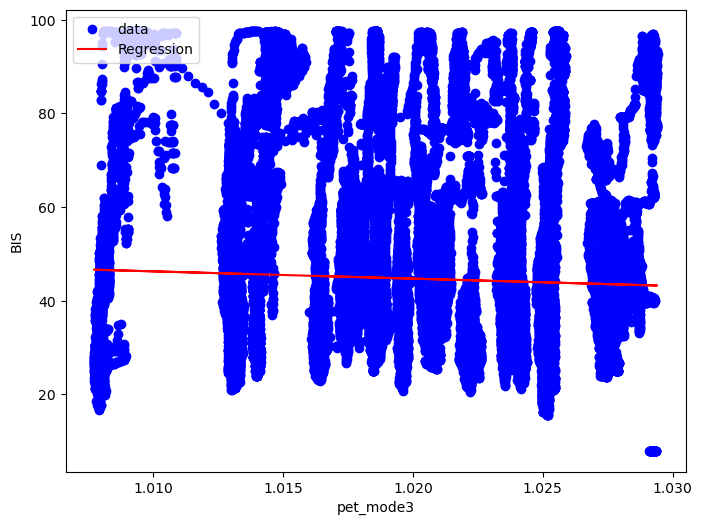

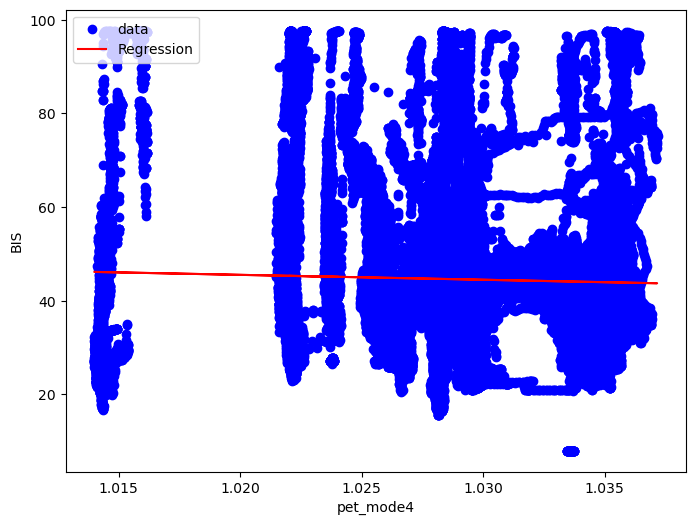

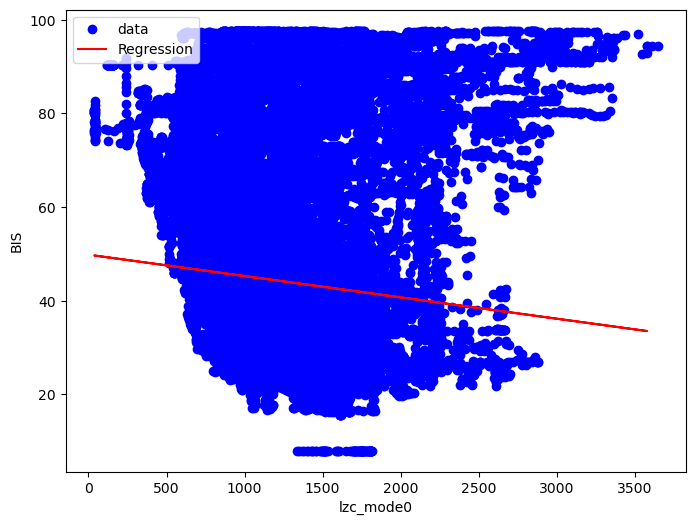

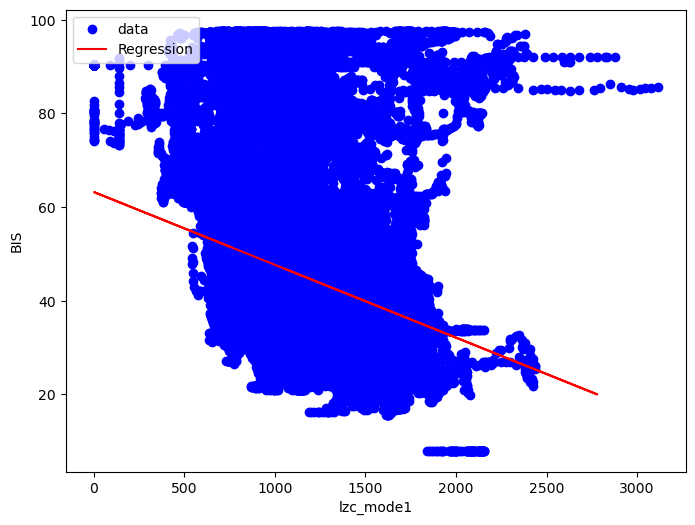

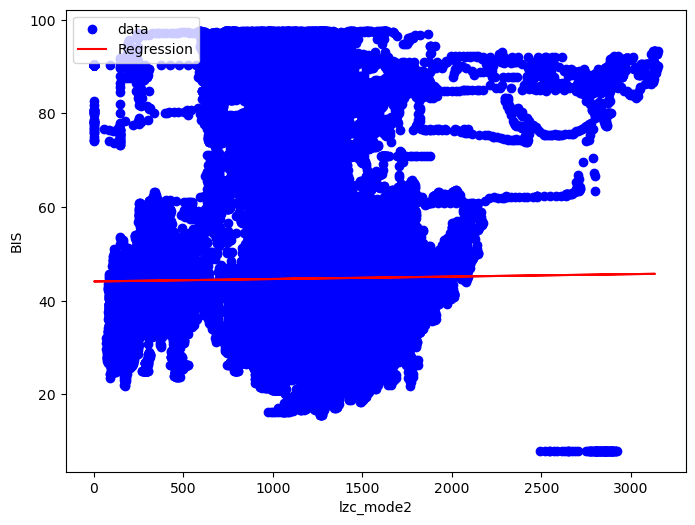

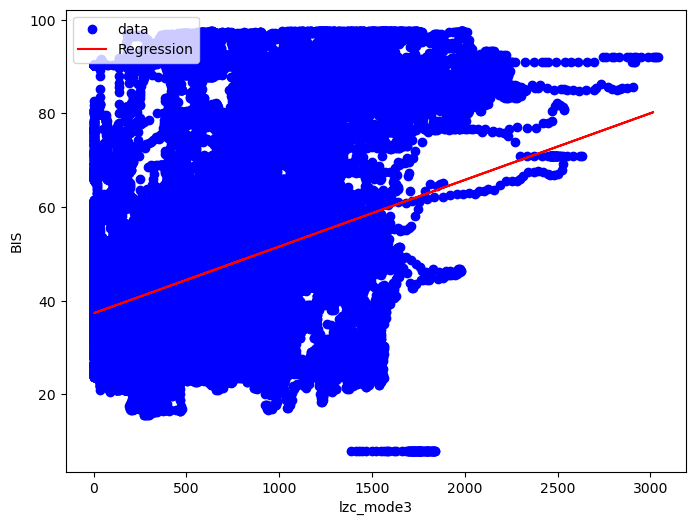

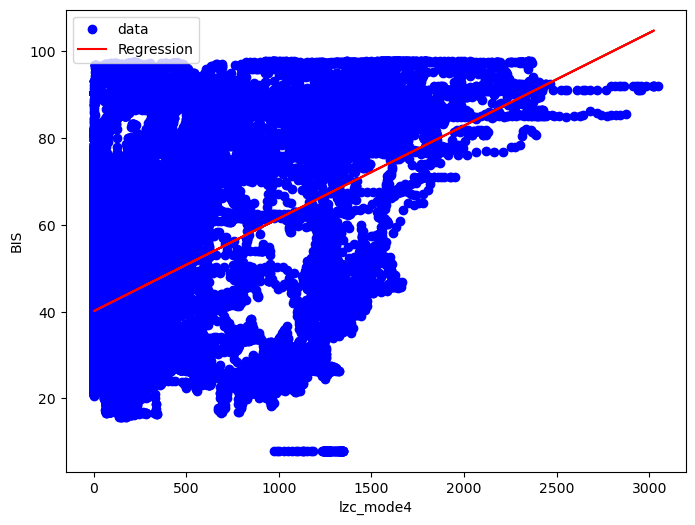

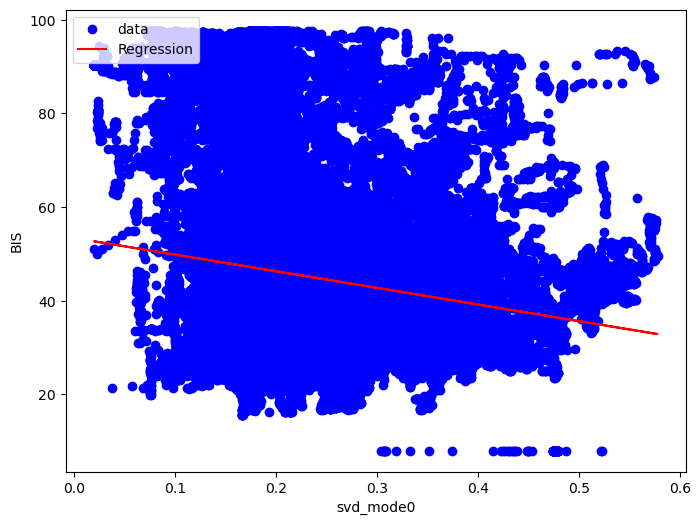

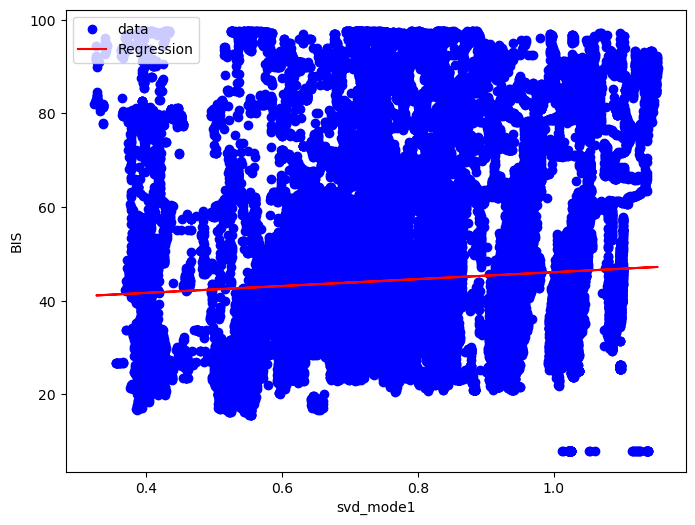

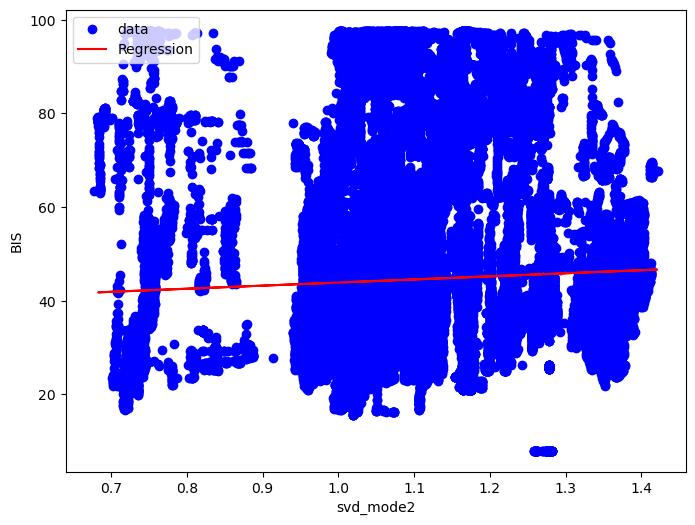

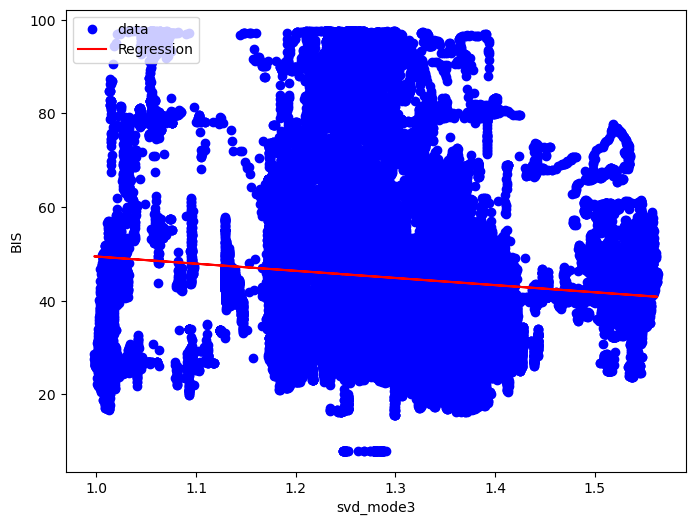

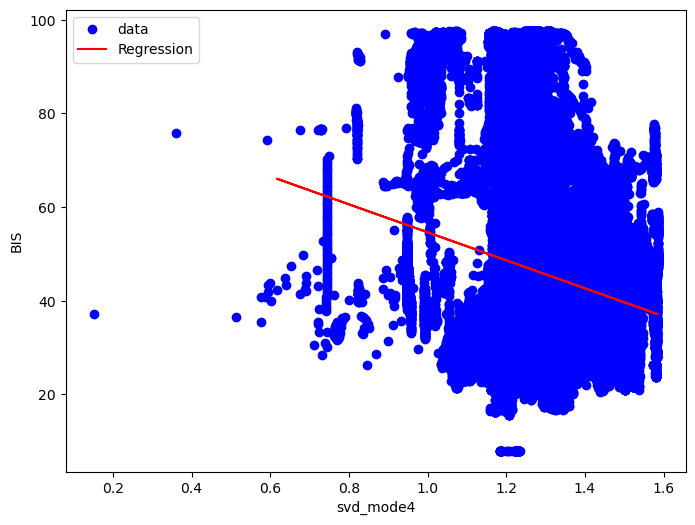

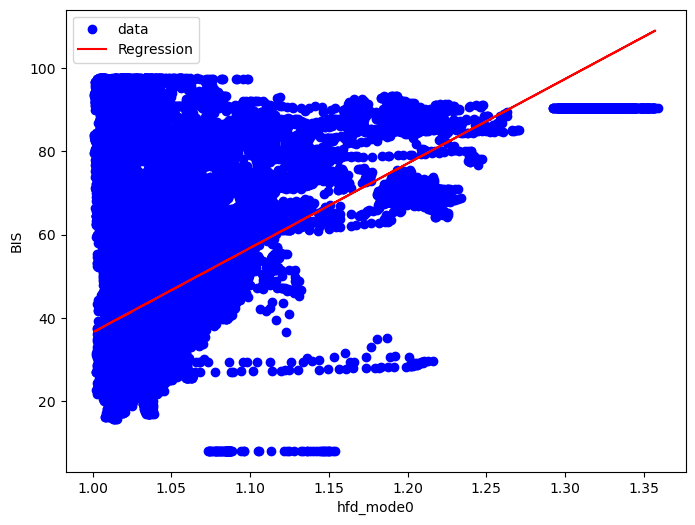

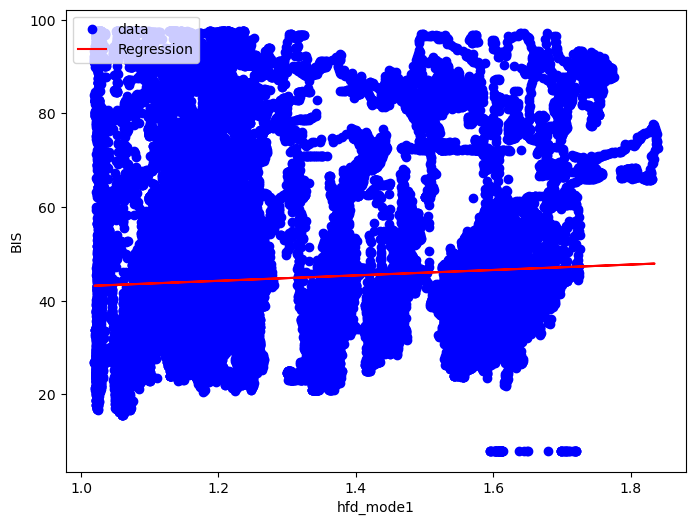

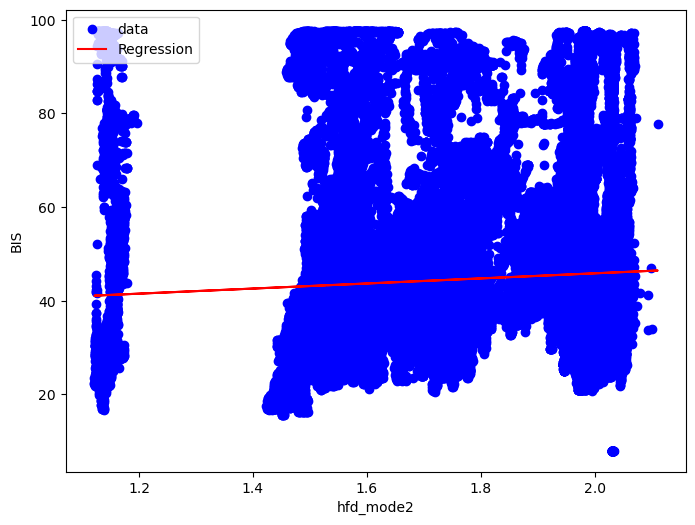

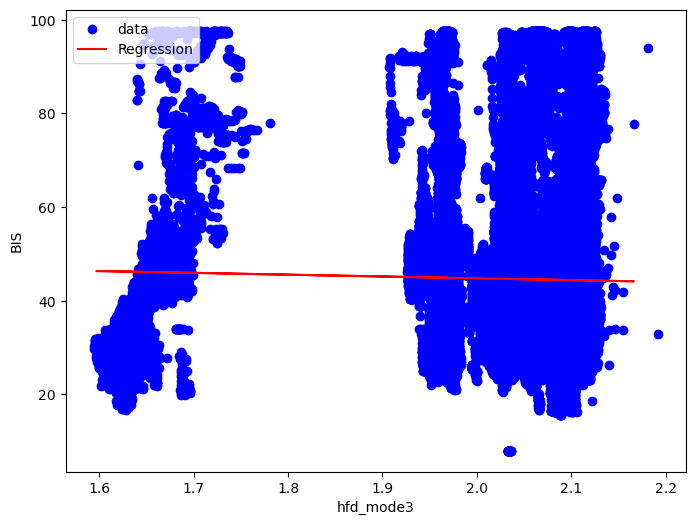

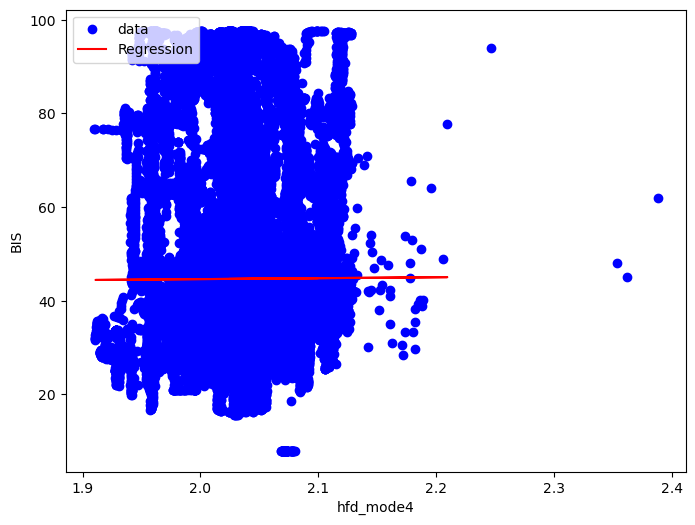

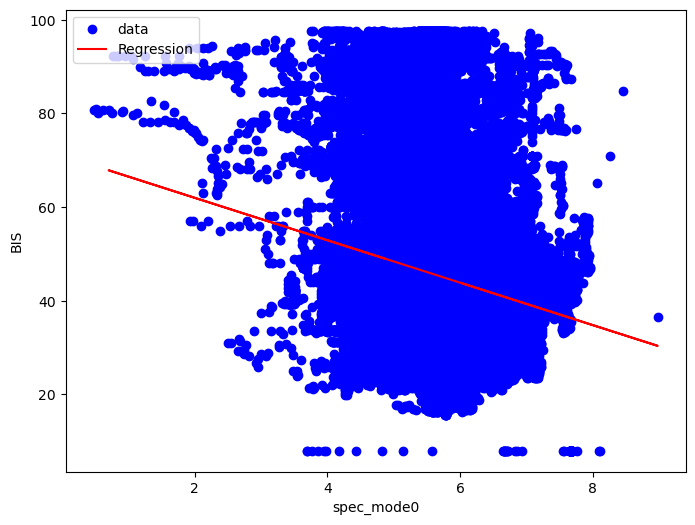

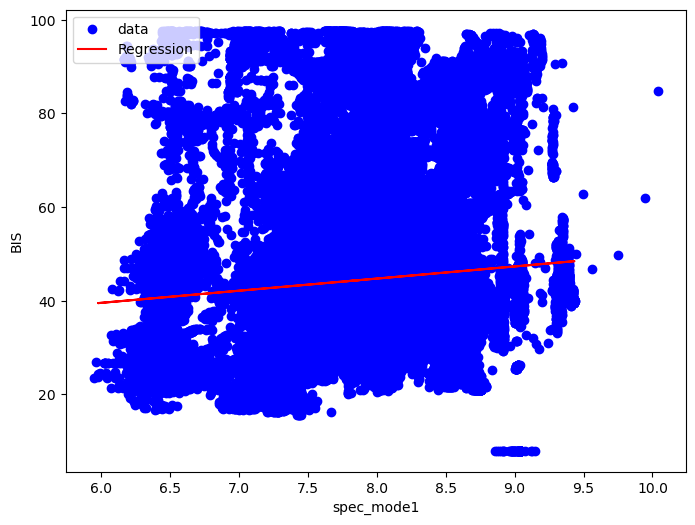

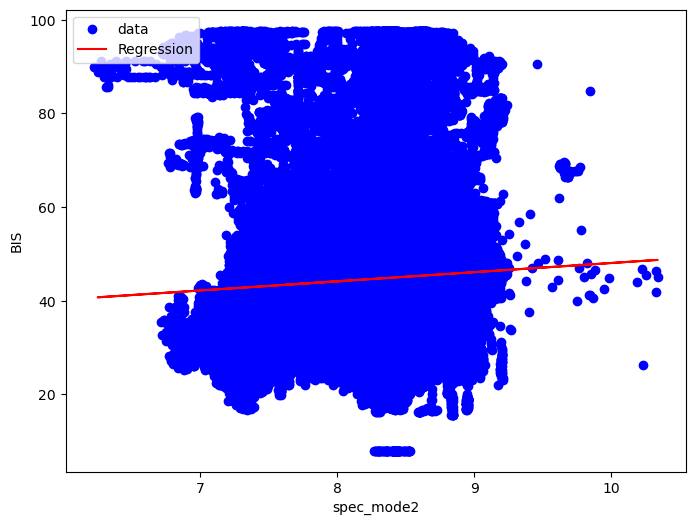

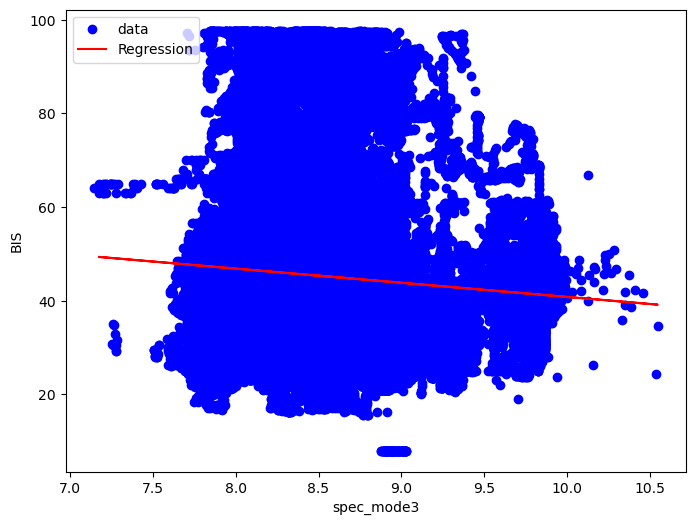

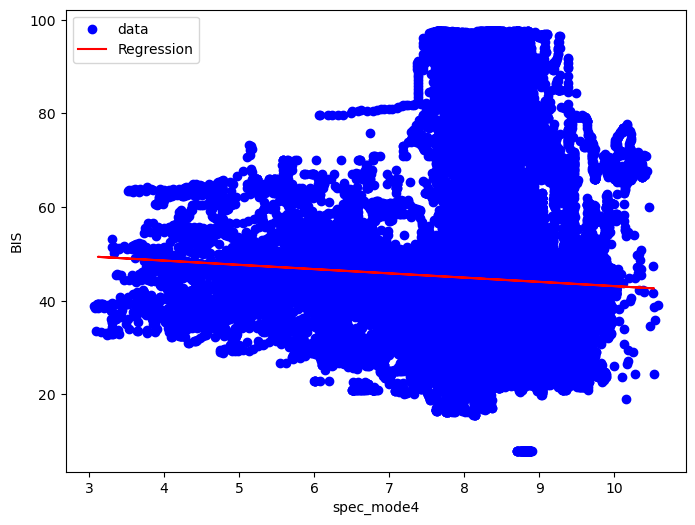

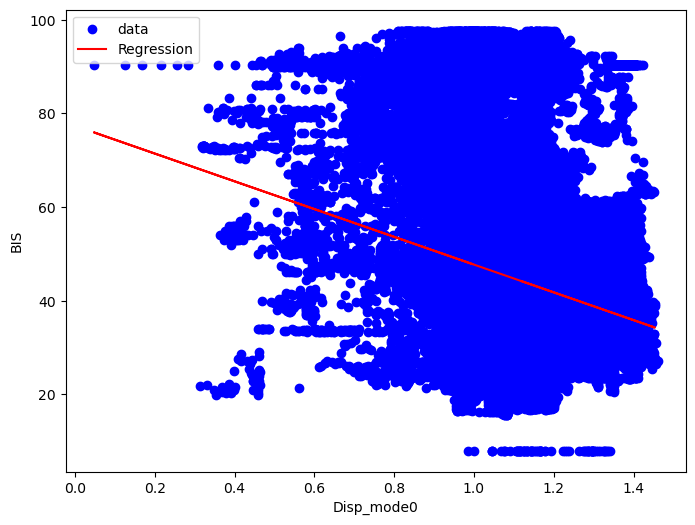

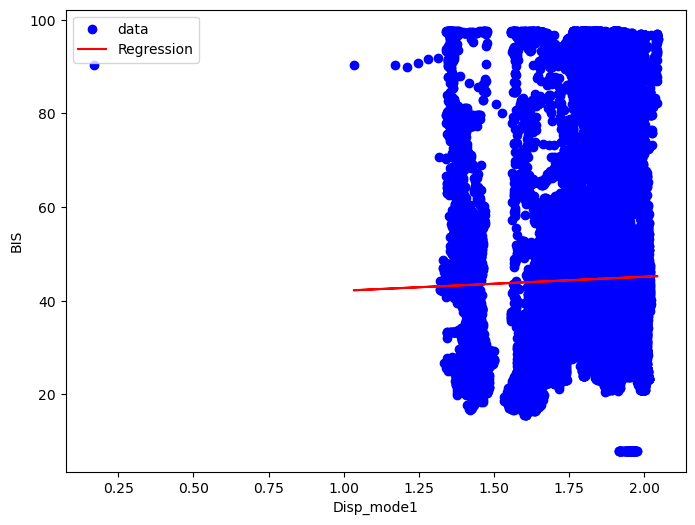

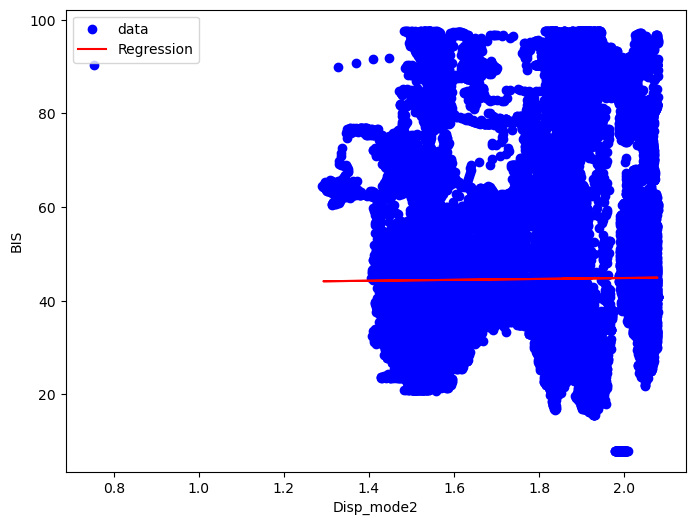

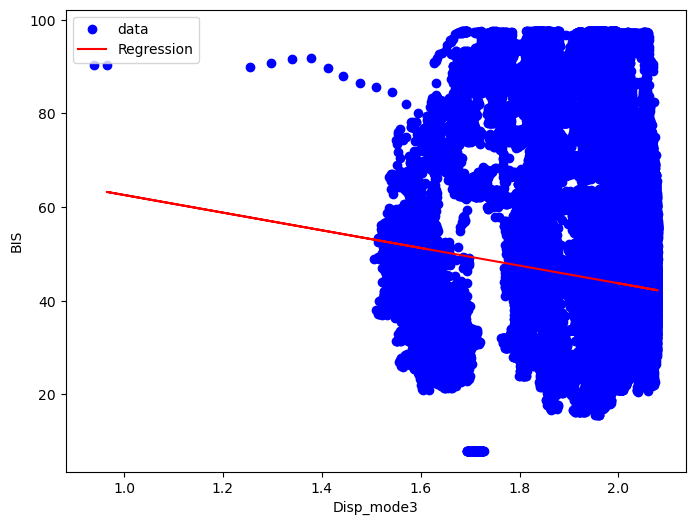

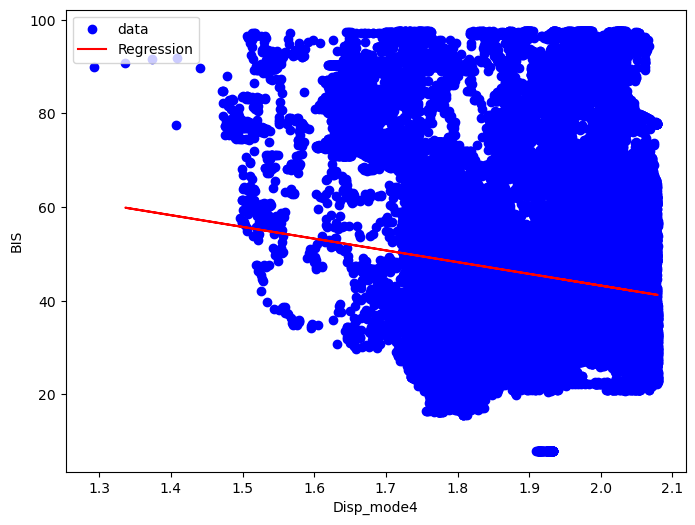

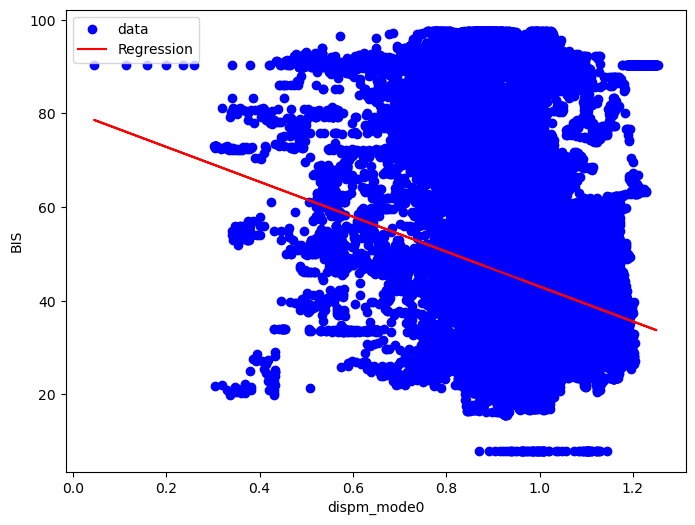

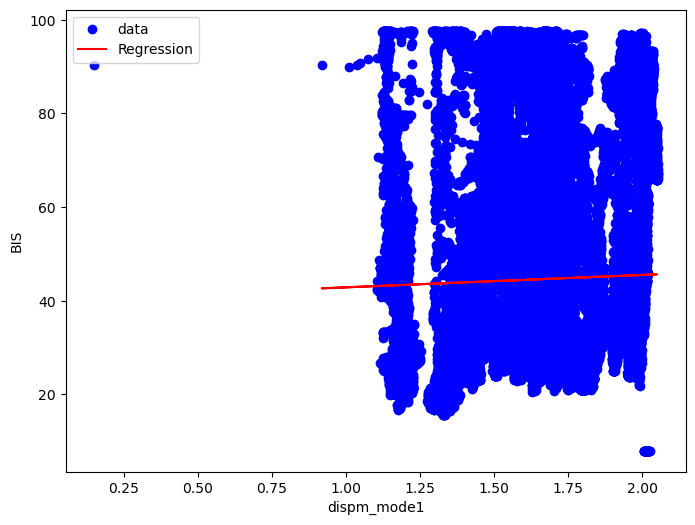

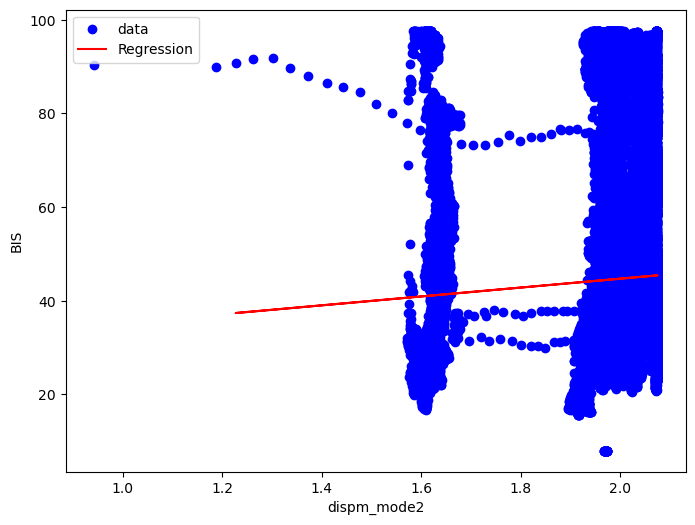

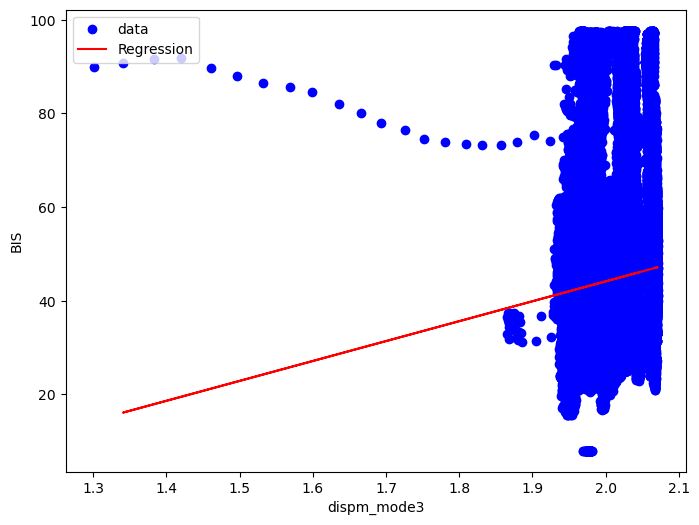

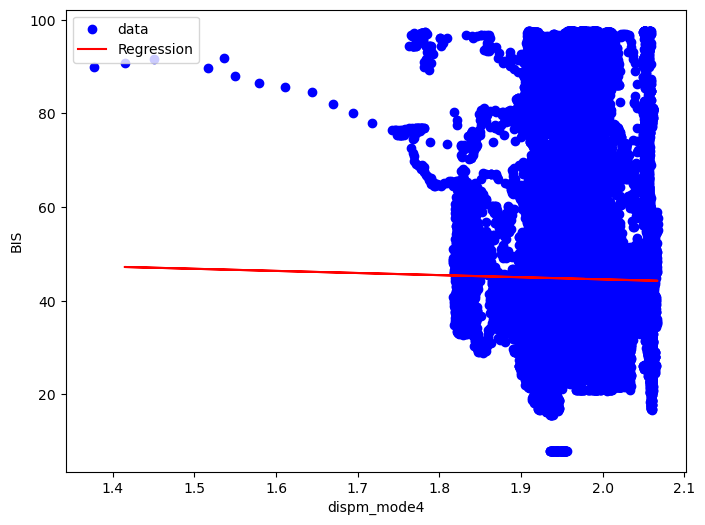

In [6]:
for column in df1.columns:
    if column == "BIS":
        continue
        
    plot_regression(df1, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})
sort_total=total.sort_values('Values', ascending=False)
sort_total[:10]

Metrics     Values
20  Perment_mode0_r  64.391678
25      pet_mode0_r  63.422115
34      lzc_mode4_r  49.919506
40      hfd_mode0_r  40.975451
33      lzc_mode3_r  40.538808
5        hc_mode0_r  34.704636
31      lzc_mode1_r  32.066733
26      pet_mode1_r  31.642009
21  Perment_mode1_r  30.985834
50     Disp_mode0_r  27.500750

In [8]:
features=['Perment_mode0', 'lzc_mode4', 'pet_mode1']

In [9]:
X=df1[features]
y=df1['BIS']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [10]:
lr_regressor=LinearRegression()
lr_regressor.fit(X_train_scaled, y_train)
y_pred = lr_regressor.predict(X_val_scaled)

In [11]:

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
train_score = lr_regressor.score(X_train_scaled, y_train)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Train score: ", train_score)

print("Multiple regression model Slope = %s, and intercept =%s"%(lr_regressor.coef_,lr_regressor.intercept_))

Mean Squared Error (MSE): 116.1327366321002
R-squared (R2): 0.5322246334932872
Train score:  0.5359591229915347
Multiple regression model Slope = [6.930205   6.0119143  2.82639707], and intercept =44.72020570872616


In [12]:
model = lr_regressor


def eva_model(model, test_data,features):
    """
    Function to test the model on test dataset and evaluate the model performance
    
    return the evaluation metrics r_squared, mse, and correlation_coefficient, 
    
    """
   
    X_test = test_data[features]  
    y_test = test_data['BIS'] 
    
    
    scaler = StandardScaler()

        
    X_test_scaled = scaler.fit_transform(X_test)
    

    y_pred = model.predict(X_test_scaled)

    # Calculate the evaluation metrics
    r_squared = r2_score(y_test, y_pred.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred.reshape(-1, 1))
    correlation_coefficient, e = pearsonr(y_test, y_pred.reshape(-1, 1))

    return r_squared, mse, correlation_coefficient

train_score= model.score(X_train_scaled, y_train)
print('Train_score: ' ,train_score )

# Evaluate the model while looping through the test data
results = []
for test_data in test_dataset:
    r_squared, mse, correlation_coefficient = eva_model(model, test_data, features)
    results.append({'R-Squared': r_squared, 'MSE': mse, 'r': correlation_coefficient})

for index, result in enumerate(results):
    print(f"Results for Test Dataset {index + 1}:")
    print("R-Squared:", result['R-Squared'])
    print("MSE:", result['MSE'])
    print('r:', result['r'])
    print("---------------------------")
    
    
    


Train_score:  0.5359591229915347
Results for Test Dataset 1:
R-Squared: 0.12256835654154186
MSE: 161.22289624943264
r: [0.7662177269680939]
---------------------------
Results for Test Dataset 2:
R-Squared: 0.37872052441432047
MSE: 96.59061689415108
r: [0.747977547682319]
---------------------------
Results for Test Dataset 3:
R-Squared: 0.0914425439239146
MSE: 157.99053894441303
r: [0.6845934948471025]
---------------------------
Results for Test Dataset 4:
R-Squared: 0.6595280372589984
MSE: 133.66632759794314
r: [0.8402135722608717]
---------------------------
Results for Test Dataset 5:
R-Squared: 0.5208965089318889
MSE: 123.42412810187699
r: [0.9099172677118382]
---------------------------
Results for Test Dataset 6:
R-Squared: 0.41418421578997455
MSE: 117.1560355569306
r: [0.7423033590825326]
---------------------------
Results for Test Dataset 7:
R-Squared: 0.6260724793860908
MSE: 98.68524128910727
r: [0.7982506937193311]
---------------------------
Results for Test Dataset 8:
R-

Normalized New Index:
[85.27115939 85.43666633 85.30557077 84.76351873 85.19494105]


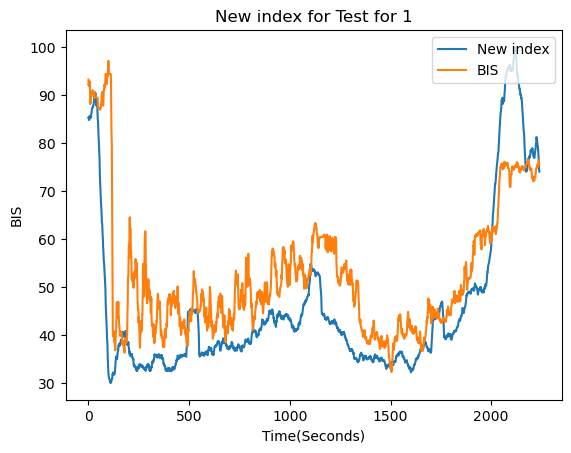

Normalized New Index:
[ 99.92119699 100.          99.37495532  98.6622497   98.54292939]


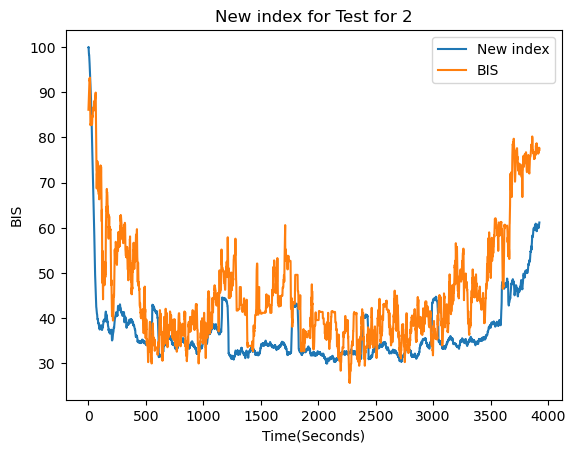

Normalized New Index:
[98.36801228 98.34971443 98.70809227 98.604607   98.81402479]


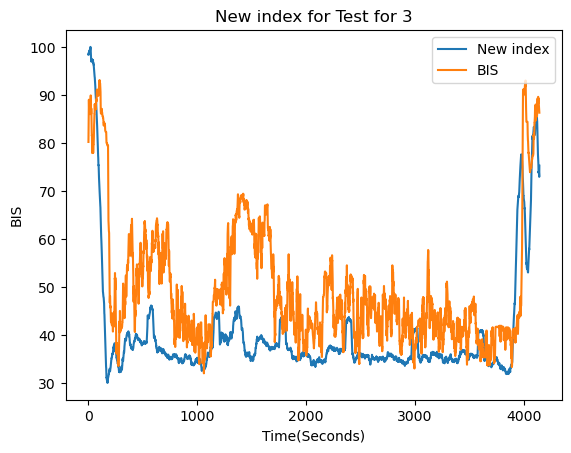

Normalized New Index:
[68.28692374 69.15699967 68.88727765 69.3040747  69.11105356]


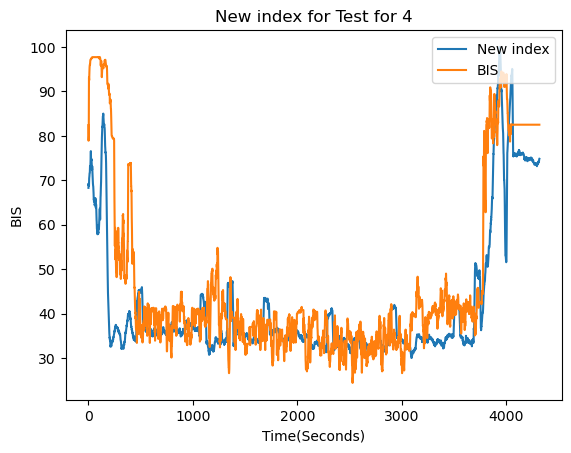

Normalized New Index:
[84.2368841  84.76267941 84.44035087 84.00634099 83.8267442 ]


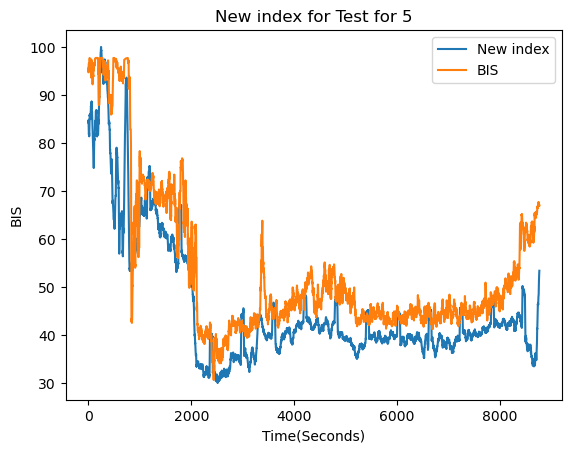

Normalized New Index:
[84.82559796 85.35015623 85.41054709 85.42477563 85.49253613]


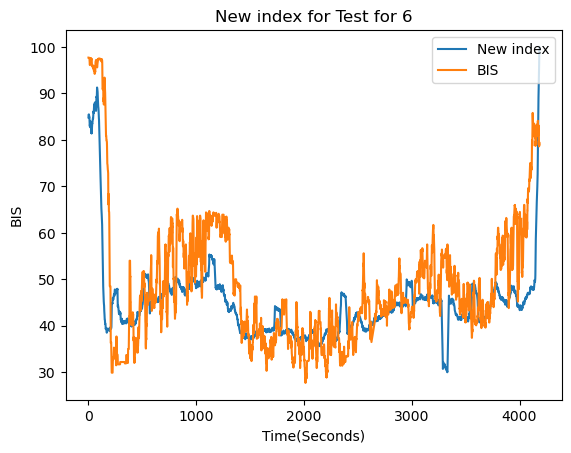

Normalized New Index:
[61.02579182 60.95419759 61.01203873 61.21668615 61.25559337]


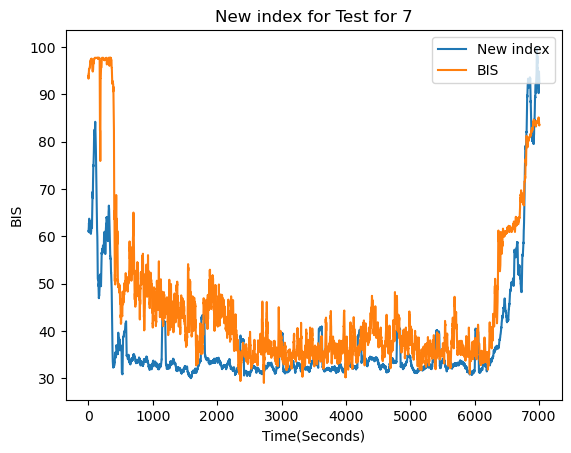

Normalized New Index:
[98.20414368 98.31941634 97.9329658  97.48016637 97.34687144]


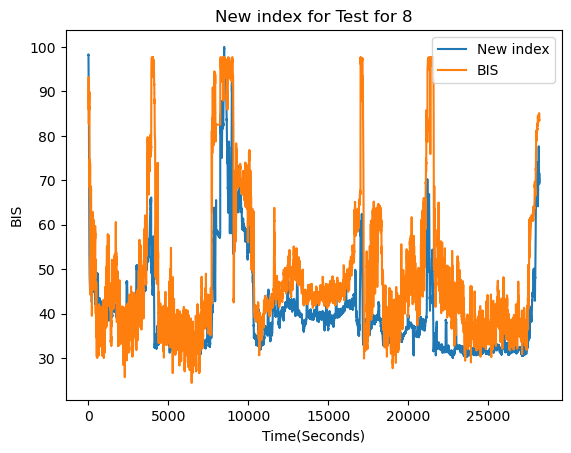

In [13]:


for index, test_data in enumerate (test_dataset):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    
        
    scaled = StandardScaler()
        
    X_test_scaled = scaled.fit_transform(X_test)

    y_pred = model.predict(X_test_scaled)
    
       
    scaler = MinMaxScaler(feature_range=(30, 100)) 
    new_index_norm = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()  # Normalize the new index

    
    print("Normalized New Index:")
    print(new_index_norm[:5]) #display first 5 data of the new index

    plt.plot(new_index_norm, label='New index')
    plt.plot(y_test, label ="BIS")
    plt.title(f"New index for Test for {index+1}")
    plt.ylabel('BIS')
    plt.xlabel('Time(Seconds)')
    plt.legend(loc="upper right")
    plt.show()


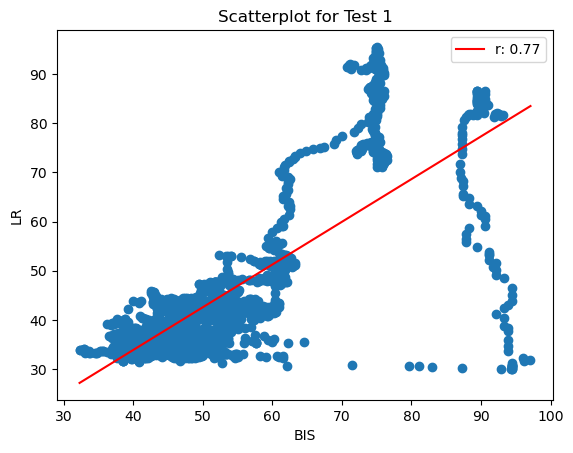

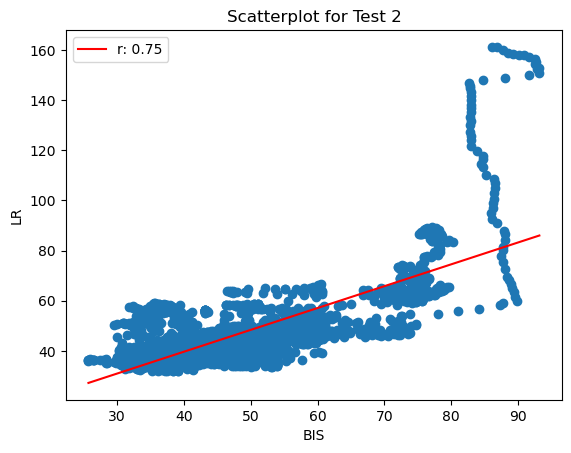

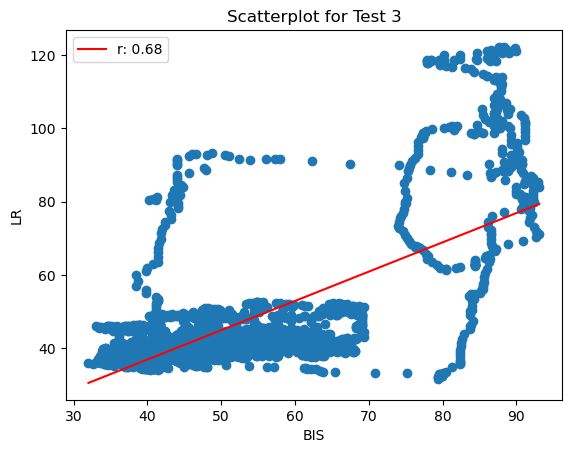

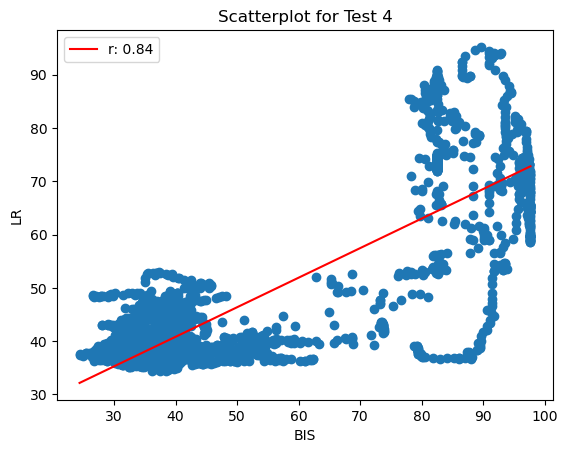

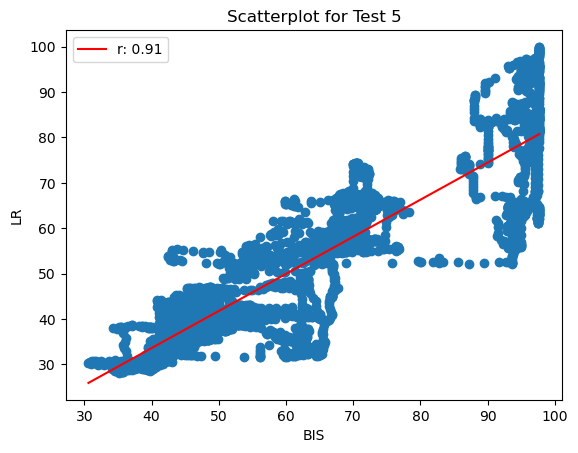

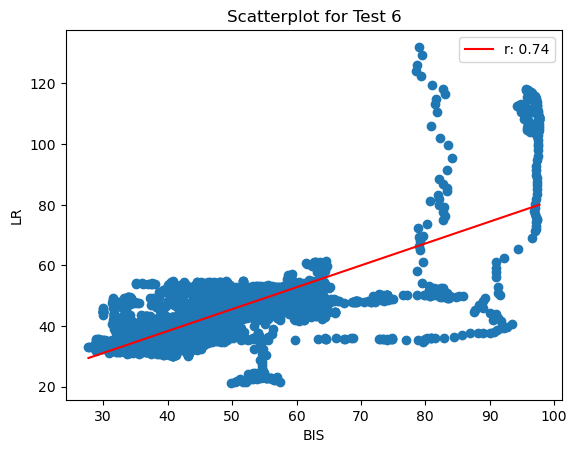

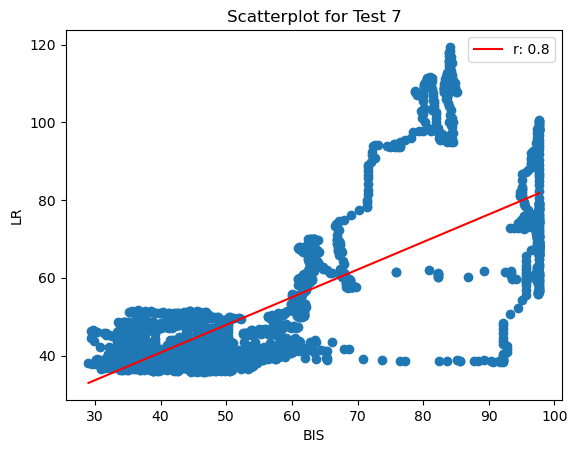

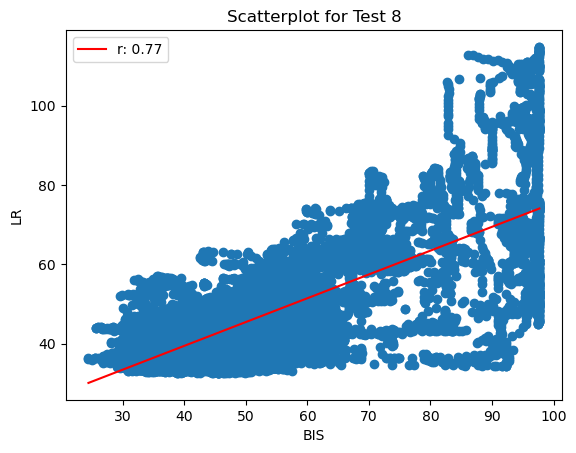

In [14]:
for index, test_data in enumerate (test_dataset):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    
        
    scaled = StandardScaler()
        
    X_test_scaled = scaled.fit_transform(X_test)

    y_pred = model.predict(X_test_scaled)
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    x_range = np.array([y_test.min(), y_test.max()])
    plt.plot(x_range, slope * x_range + intercept, color='red', label=f'r: {round(r_value, 2)}')
    plt.scatter(y_test, y_pred)
    plt.xlabel('BIS')
    plt.ylabel('LR')
    plt.title(f'Scatterplot for Test {index+1}' )
    plt.legend()
    plt.show()

Test Dataset 1:difference between CI and regression line = 19.68


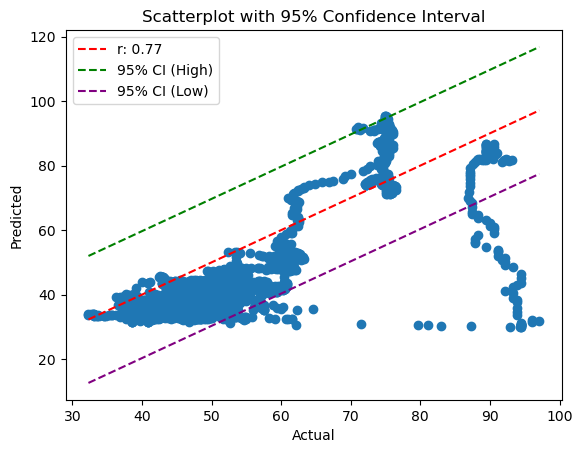

Test Dataset 2:difference between CI and regression line = 19.15


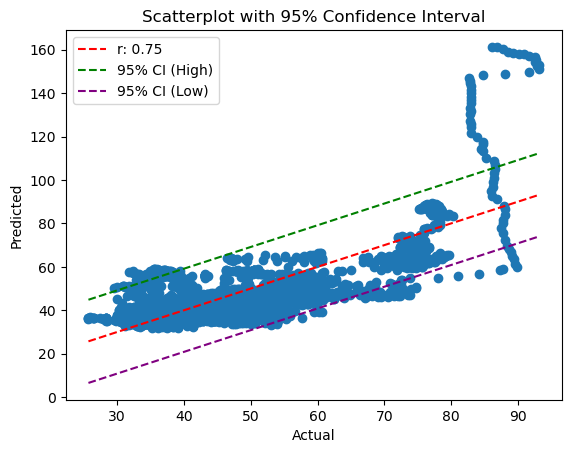

Test Dataset 3:difference between CI and regression line = 22.60


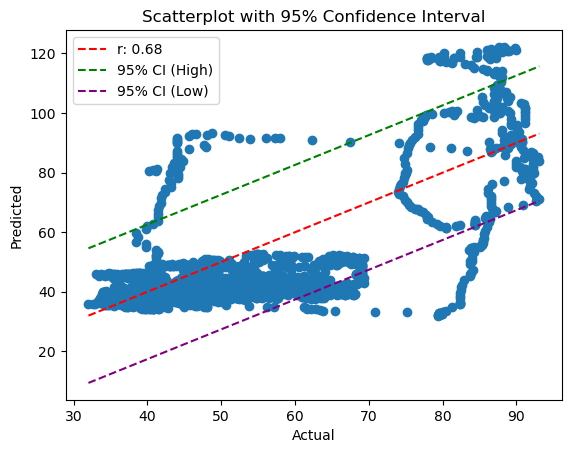

Test Dataset 4:difference between CI and regression line = 22.19


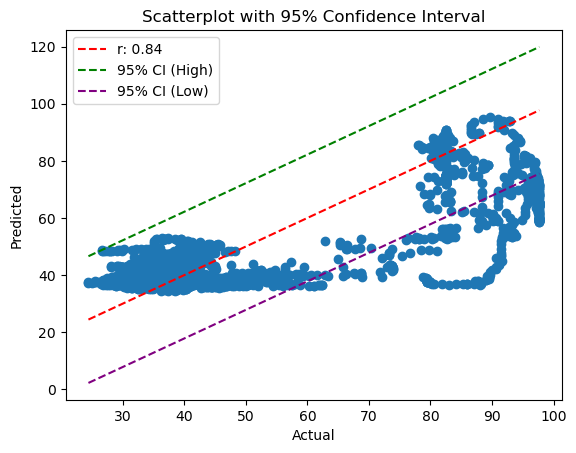

Test Dataset 5:difference between CI and regression line = 13.05


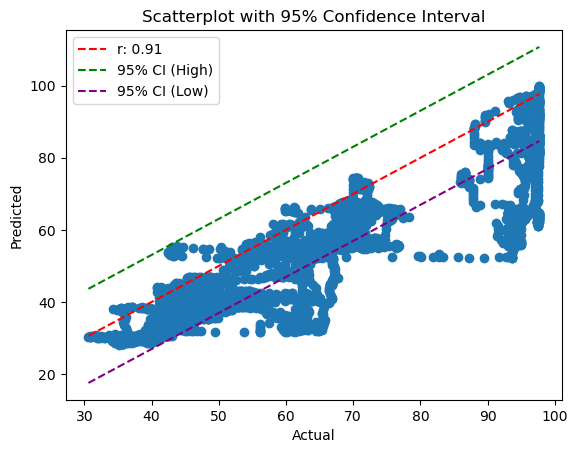

Test Dataset 6:difference between CI and regression line = 19.64


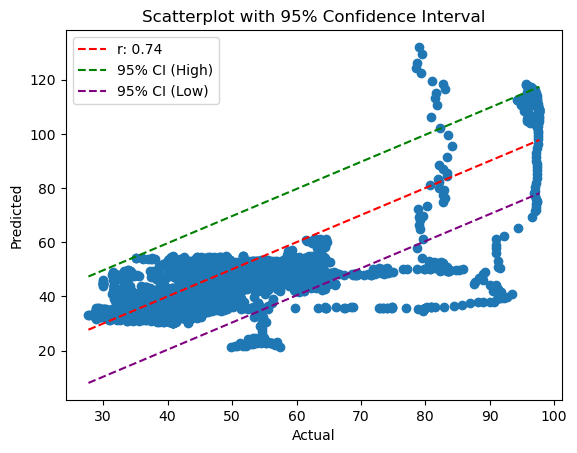

Test Dataset 7:difference between CI and regression line = 19.40


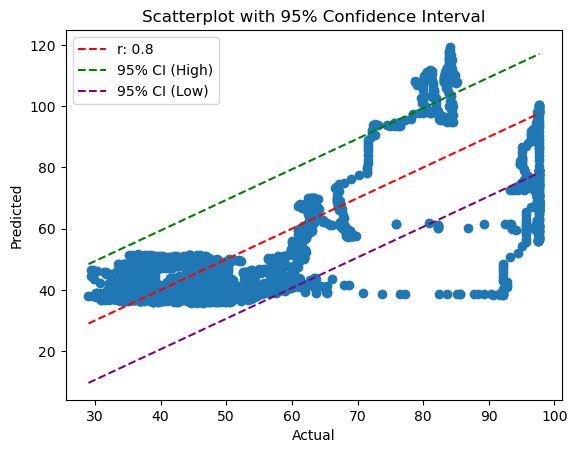

Test Dataset 8:difference between CI and regression line = 20.35


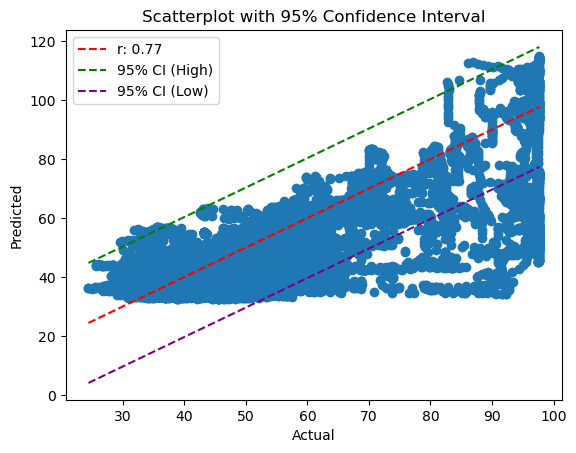

In [15]:
for index, test_data in enumerate (test_dataset):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    
        
    scaled = StandardScaler()
        
    X_test_scaled = scaled.fit_transform(X_test)

    y_pred = model.predict(X_test_scaled)
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Plot a scatterplot of actual vs. predicted values
    plt.scatter(y_test, y_pred)

    # Calculate the 95% confidence interval for the regression line
    ci = 1.96 * np.std(y_test - y_pred)  # 95% confidence interval

    # Plot the regression line
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',  label=f'r: {round(r_value, 2)}')
    plt.plot([min(y_test), max(y_test)], [min(y_test) + ci, max(y_test) + ci], linestyle='--', color='green', label='95% CI (High)')
    plt.plot([min(y_test), max(y_test)], [min(y_test) - ci, max(y_test) - ci], linestyle='--', color='purple', label='95% CI (Low)')

    # Calculate the difference between the upper bound of the confidence interval and the regression line
    ci_high_difference = ci

    # Calculate the difference between the lower bound of the confidence interval and the regression line
    ci_low_difference = -ci
    
    print(f'Test Dataset {index + 1}:difference between CI and regression line = {ci_high_difference:.2f}')
    #print(f'Test Dataset {index + 1}: CI Low - Regression Line = {ci_low_difference:.2f}')

    
    # Set plot labels and title
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Scatterplot with 95% Confidence Interval')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()
